In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('NAS.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
4,2003-12-24,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.dropna(inplace = True)

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
7,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0


In [6]:
#df.drop(['Open', 'High', 
 #               'Low', 'Adj Close', 'Volume'], axis=1, inplace=True)

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
7,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0


In [8]:
df["Date"] = pd.to_datetime(df["Date"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4218 entries, 0 to 4252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4218 non-null   datetime64[ns]
 1   Open       4218 non-null   float64       
 2   High       4218 non-null   float64       
 3   Low        4218 non-null   float64       
 4   Close      4218 non-null   float64       
 5   Adj Close  4218 non-null   float64       
 6   Volume     4218 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 263.6 KB


In [10]:
X= df.iloc[:, :1].values
y= df.iloc[:, 4].values

In [11]:
print(X)

[['2003-12-18T00:00:00.000000000']
 ['2003-12-19T00:00:00.000000000']
 ['2003-12-22T00:00:00.000000000']
 ...
 ['2020-10-14T00:00:00.000000000']
 ['2020-10-15T00:00:00.000000000']
 ['2020-10-16T00:00:00.000000000']]


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#y_train = y_train.reshape(-1,1)
#y_test = y_test.reshape(-1,1)

In [13]:
#df[['Year', 'Month', 'Date']] = df.Date.str.split("-",expand=True)

#df['Date'] = df['Year'] + df['Month'] + df['Date']

In [14]:
#df.drop(['Year', 'Month'], axis=1, inplace=True)

In [15]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2003-12-18,19.482599,19.596901,19.025499,19.139799,19.139799,4978496.0
1,2003-12-19,19.368299,19.425501,18.282801,18.454201,18.454201,1410901.0
2,2003-12-22,18.739901,18.739901,17.997101,18.054300,18.054300,137047.0
3,2003-12-23,17.997101,17.997101,17.368700,17.425800,17.425800,229418.0
7,2003-12-29,17.425800,17.425800,16.854500,17.254400,17.254400,196206.0


In [16]:
#from sklearn.preprocessing import StandardScaler

#sc_X = StandardScaler()
#sc_y = StandardScaler()

#X_train = sc_X.fit_transform(X_train)
#X_test = sc_X.fit_transform(X_test)

#y_train = sc_y.fit_transform(y_train)
#y_test = sc_y.fit_transform(y_test)

In [17]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=5000, criterion='mse', random_state=0)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=5000, random_state=0)

In [18]:
#y_pred=model.predict(X_test)
#y_pred=y_pred.reshape(-1, 1)
#y_pred=sc_y.transform(y_pred)

In [19]:
#from sklearn import metrics  
#print("MAE", metrics.mean_absolute_error(y_test, y_pred))
#print("MSE", metrics.mean_squared_error(y_test, y_pred))
#print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#print("Score:", model.score(X_test, y_test))

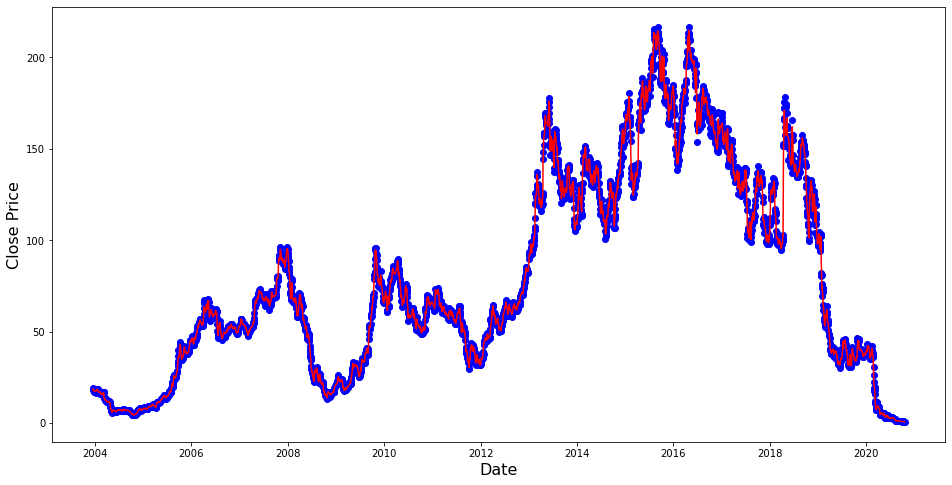

In [20]:
#%matplotlib inline
plt.figure(figsize=(16,8))
plt.xlabel('Date',fontsize=16)
plt.ylabel('Close Price',fontsize=16)
plt.scatter(df.Date,df.Close,color='blue')

plt.plot(df.Date, model.predict(X),color='red')
